Trong module trước, chúng ta đã tìm hiểu qua một số khái niệm xử lý ngôn ngữ tự nhiên. Điểm mấu chốt của xử lý đó là là mã hóa văn bản thành token (chuyển từ thành số) và tạo nhúng (tạo biểu diễn của những từ dưới dạng số).

Trong dự án này, chúng ta sẽ áp dụng những gì đã làm để xây dựng mô hình deep learning với dữ liệu phân loaị cấu trúc của một văn bản [*PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071).

Khi được phát hành, bài báo đã trình bày một tập dữ liệu mới có tên PubMed 200k RCT bao gồm ~200.000 bản tóm tắt Thử nghiệm có Kiểm soát Ngẫu nhiên (RCT) có sẵn label.

Mục tiêu của tập dữ liệu là khám phá khả năng của các mô hình NLP để phân loại vai trò của các câu xuất hiện theo thứ tự tuần tự. Nói cách khác, với phần tóm tắt của một RCT, mỗi câu đóng vai trò nào đó trong phần tóm tắt của văn bản. 

![Skimlit example inputs and outputs](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-skimlit-overview-input-and-output.png)
* Ví dụ input ([phần tóm tắt khó đọc hơn từ PubMed] (https://pubmed.ncbi.nlm.nih.gov/28942748/)) và output ([phần tóm tắt dễ đọc hơn] (https://pubmed.ncbi.nlm .nih.gov / 32537182 /)) của mô hình chúng ta sẽ xây dựng. Mô hình sẽ lấy một một văn bản trừu tượng và dự đoán label của câu đó là gì.*

Ví dụ: chúng ta có thể train một mô hình NLP lấy input sau đây (lưu ý: mẫu sau đã thay thế tất cả các ký hiệu số  bằng "@"):

```
To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).
```

Và sau khi mô hình xử lý xong, chúng ta sẽ mong chờ một output như sau : 

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

**Bối cảnh** 

Số lượng các bài báo, tạp chí RCT được phát hành ngày càng nhiều, có những bài báo không có cấu trúc tóm tắt có thể rất khó đọc và do đó làm chậm quá trình đọc của các nhà nghiên cứu trong việc tìm hiểu tài liệu.

**Giải pháp** 

Tạo mô hình NLP để phân loại các câu trừu tượng theo vai trò của chúng (ví dụ:  objective, methods, results, v.v.) để cho phép các nhà nghiên cứu đọc lướt qua tài liệu và đi sâu hơn khi cần thiết.

> 📖 Nguồn tham khảo : 
> 1. Nguồn dữ liệu:  [*PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071)
> 2. Mô hình chúng ta sẽ xây dựng [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf)

Nội dung của bài viết này gồm : 

1. Download tập dữ liệu
2. Tiền xử lý dữ liệu
3. Khám phá dữ liệu
4. Khởi tạo và train mô hình : 
  + Model 0 : Mô hình cơ sở (machine learning) 
  + Mô hình Deep learning với sự kết hợp các layer : nhúng từ mã hóa (token embeddings), nhúng ký tự mã hóa (character embeddings), nhúng mã được train sẵn, nhúng vị trí của câu trong văn bản. 
  + Xây dựng mô hình đa phương thức (multimodal model) (kết hợp nhiều kiểu dữ liệu input)
    + Nhân rộng kiến ​​trúc mô hình từ https://arxiv.org/pdf/1612.05251.pdf 
5. So sánh hiệu suất của mô hình
6. Tìm các dự đoán sai nhiều nhất
7. Đưa ra dự đoán trên bản tóm tắt PubMed 

## 1. Download tập dữ liệu

Trước khi có thể bắt đầu xây dựng một mô hình, chúng ta cần tải xuống tập dữ liệu PubMed 200k RCT.

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git 

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.


In [2]:
!ls

pubmed-rct  sample_data


Kiểm tra thư mục `pubmed-rct`, bạn có thể thấy có bốn thư mục, Mỗi một thư mục là một bản chứa phiên bản khác nhau của tập dữ liệu PubMed 200k RCT. 

Đọc qua [README file](https://github.com/Franck-Dernoncourt/pubmed-rct) chúng ta có thể nắm một số thông tin của tập dữ liệu như sau : 

* PubMed 20k là một tập con của PubMed 200k. Tức là, bất kỳ phần tóm tắt nào trong PubMed 20k cũng có trong PubMed 200k.
* `PubMed_200k_RCT` giống như` PubMed_200k_RCT_numbers_replaced_with_at_sign`, ngoại trừ ở phần sau, tất cả các số đã được thay thế bằng `@`. (tương tự cho `PubMed_20k_RCT` so với `PubMed_20k_RCT_numbers_replaced_with_at_sign`).
* Vì giới hạn kích thước tệp Github là 100 MiB, chúng ta phải nén `PubMed_200k_RCT\train.7z` và `PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip`.

Thay vì làm việc với toàn bộ tập dữ liệu 200k, chúng ta sẽ để cho các thử nghiệm diễn ra nhanh chóng bằng cách bắt đầu với một tập dữ liệu có kích thước nhỏ hơn. Ngoài ra, chúng ta sẽ sử dụng tập dữ liệu `PubMed_20k_RCT_numbers_replaced_with_at_sign` thay vì dụng dữ liệu có chứa các số liệu, điều đó sẽ gây ảnh hưởng đến mô hình train ít nhiều.



In [3]:
!ls /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


Trong `PubMed_20k_RCT_numbers_replaced_with_at_sign` có 3 files gồm : 
+ train.txt : mẫu dữ liệu để train 
+ dev.txt : mẫu dữ liệu để kiểm định mô hình, dữ liệu này có tên thông thường là `validation_data` 
+ test.txt : mẫu dữ liệu không có label, được sử dụng để dự đoán mô hình. 

In [4]:
# Bắt đầu bằng cách sử dụng tập dữ liệu 20k
data_20k_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

Tạo đường dẫn liên kết đến các file trong `pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign`

In [5]:
import os 
filepaths = [os.path.join(data_20k_dir, filename) for filename in os.listdir(data_20k_dir)]
filepaths

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

Ngoài ra, chúng ta cũng không quên tải file `utility_functions.py` xuống : 

In [6]:
!wget  https://www.dropbox.com/s/v4sla7jvi9cltg8/utility_functions.py

--2021-09-24 13:20:31--  https://www.dropbox.com/s/v4sla7jvi9cltg8/utility_functions.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v4sla7jvi9cltg8/utility_functions.py [following]
--2021-09-24 13:20:31--  https://www.dropbox.com/s/raw/v4sla7jvi9cltg8/utility_functions.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc07be9c48e8ff990a5dd94c3e34.dl.dropboxusercontent.com/cd/0/inline/BWwbCyvSoe8Pq77jQDtTxXN5TbiWk3ZIxc4918YHjhpNy2ARkHuW4VNrxVA-bCKLS-yxgEhD7tw6gD6Hb1TGNqJgLz7xirm1u-xQQbb9ri5ryrZKuT_Jyg38iJqno5Y2qNIZBLyvOOpQduInmMpfBji6/file# [following]
--2021-09-24 13:20:32--  https://uc07be9c48e8ff990a5dd94c3e34.dl.dropboxusercontent.com/cd/0/inline/BWwbCyvSoe8Pq77jQDtTxXN5TbiWk3ZIxc4918YHjhpNy2ARkHuW4VNrxVA-bCKLS-

## 2. Tiền xử lý dữ liệu

Vì dữ liệu hiên tại là dữ liệu văn bản, chúng ta sẽ xem vài bản tóm tắt trong văn bản đó trước khi tiến hành xử lý và đồng bộ dữ liệu.

In [7]:
with open(filepaths[1]) as fs : 
  data = fs.read()
  print(data[:2000])

###24845963
BACKGROUND	This study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .
RESULTS	A post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .
RESULTS	Liver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .
RESULTS	Survival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .
RESULTS	The percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .
RESULTS	When mean hemodynamic profiles were c

Nhiệm vụ của chúng ta sẽ tạo một bảng thống kê với `DataFrame` để sắp xếp cấu trúc, vị trí của các thành phần theo đúng định dạng. Ngoài ra, chúng ta cần phải bổ sung tổng số dòng của một văn bản, và thứ tự của câu (dòng) đó nằm ở dòng bao nhiêu. 

Tóm lại, `DataFrame` chúng ta cần có các cột sau : `text`, `label`, `line_number`, `total_lines`

Vì chúng ta sẽ phải xử lý đến 3 files `train.txt`, `dev.txt` và `test.txt` nên cần tạo hàm để có thể sử dụng được nhiều lần. 



In [8]:
def get_lines(filepath) :
  """
  Reads filepath (a text file) and returns the lines of text as a list.
  Params : 
    filepath str: a string containing the target filepath to read
  Returns : 
    A list of strings with one string per line from the target filename.
    For example:
    ["this is the first line of filename",
      "this is the second line of filename",
      "..."]
  """ 
  with open(filepath, "r") as fs : 
    return fs.readlines()

In [9]:
dev_lines = get_lines(os.path.join(data_20k_dir, "dev.txt"))
dev_lines[:20]

['###24290286\n',
 'BACKGROUND\tIgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .\n',
 'BACKGROUND\tIt is not clear whether these patients would benefit from antifungal treatment .\n',
 'OBJECTIVE\tWe sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus .\n',
 'METHODS\tAsthmatic patients who were IgE sensitized to A fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .\n',
 'METHODS\tPrimary outcomes were improvement in quality of life at the end of the treatment period and a reduction in the number of severe exacerbations over the @ months of the study .\n',
 'RESULTS\tSixty-five patients were randomized .

Trong VD mẫu bản tóm tắt trên, chúng ta có thể nhận diện một số đặc điểm của bản tóm tắt như sau  :
+ `###` : bắt đầu bản tóm tắt, hay có thể hiểu đây là id đánh dấu của một bản tóm tắt. 
+ `BACKGROUND`, `RESULTS`, `OBJECTIVES`, `CONCLUSION` ... : chính là các label để xác định vai trò, vị trị của câu trong bản tóm tắt. 
+ Còn câu sau khi thụt lề bởi của các từ in hoa sẽ là `text` thể hiện nội dung của bản tóm tắt. 
+ Vai trò của mỗi câu được đặt trước ở đầu mỗi dòng được phân tách bằng dấu tab `(\t)` và mỗi câu kết thúc bằng một dòng mới `(\n)`
+ Trước khi bắt đầu một bản tóm tắt mới sẽ có một ký hiệu newlines (`\n`)


Có vẻ như chúng ta phải thực hiện một số bước để  làm cho các mẫu sẵn sàng chuyển làm dữ liệu đưa vào mô hình. 

Chúng ta sẽ tạp một hàm để thực hiện các bước sau:

+ Đọc từng dòng văn bản trong file được chỉ định thông qua hàm `get_lines()`
+ Tạo một list để chứa vị trí, nội dung từ các đăc điểm câu qua từng dòng. 
+ Qua mỗi dòng trong một file được chỉ định:
  + Nếu dòng đó bắt đầu với ký hiệu `###`, đó là ID của bản tóm tắt và là dấu hiệu của một bản tóm tắt mới
    + Giữ số lượng dòng trong một mẫu.
  + Nếu dòng đó là một newlines `\n` nghĩa là đánh dấu sự kết thúc của một bản tóm tắt để bước sang bản khác: 
    + Giữ  tổng số dòng trong một mẫu
  + Ghi lại văn bản trước dấu `\t` làm label của dòng.
  + Ghi lại văn bản sau dấu `\t` làm text của dòng.
+ Trả lại tất cả các dòng trong tệp văn bản đích dưới dạng danh sách các từ điển có chứa các cặp khóa / giá trị: 
  + `"line_number"` - vị trí của dòng trong phần tóm tắt (VD : `3`).
  + `"label"` -vai trò của dòng trong phần tóm tắt (VD : `OBJECTIVE`).
  + `"text"` - Đoạn text của dòng trong bản tóm tắt 
  + `"total_lines"`- tổng số dòng trong một mẫu tóm tắt (VD :` 14`)

Ví dụ trả về mẫu đã xử lý trước (một dòng đơn từ phần tóm tắt):

```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]
```



In [10]:
def preprocess_text(filepath) : 
  """
  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.
  Params : 
     filepath str: a string of the target text file to read and extract line data from
  Returns : 
    A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  text_lines = get_lines(filepath) 
  abstract_samples = [] 
  current_abstract = "" 
  for line in text_lines : 
    if line.startswith("###") : 
      current_abstract = ""
    elif line.isspace():  
      splited_lines_current_abstract = current_abstract.splitlines()
      for abstract_line_number, abstract_line in enumerate(splited_lines_current_abstract) : 
        splited_abstract_line = abstract_line.split("\t") #  split target label from text
        abstract_data = {
            "label" : splited_abstract_line[0], # get target label
            "text" : splited_abstract_line[1].lower(), # get target text and lower it
            "line_number" : abstract_line_number, #  what number line does the line appear in the abstract?
            "total_lines" : len(splited_lines_current_abstract) - 1 # how many total lines are in the abstract? (start from 0)
        }
        abstract_samples.append(abstract_data)
    else : 
      current_abstract += line
  return abstract_samples

Tạo hàm đã xong, bât giờ chúng ta sẽ xử lý dữ liệu cho cả 3 files

In [11]:
%%time 
train_samples = preprocess_text(os.path.join(data_20k_dir, "train.txt"))
val_samples = preprocess_text(os.path.join(data_20k_dir, "dev.txt"))
test_samples = preprocess_text(os.path.join(data_20k_dir, "test.txt"))


CPU times: user 517 ms, sys: 110 ms, total: 627 ms
Wall time: 627 ms


In [12]:
train_samples[:15]

[{'label': 'OBJECTIVE',
  'line_number': 0,
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'label': 'METHODS',
  'line_number': 1,
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'label': 'METHODS',
  'line_number': 2,
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'label': 'METHODS',
  'line_number': 3,
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'label': 'METHODS',
  'line_number': 4,
  'text': 'secondary outcome measures included the

Tiếp theo, chúng ta sẽ sử dụng `pd.DataFrame()` để chuyển mọi dữ liệu `_samples` trên về dạng bảng nhằm quan sát thuận tiện hơn

In [13]:
import pandas as pd 
import numpy as np

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df

,label,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


Cool, việc khám phá dữ liệu lúc này đã trở nên dễ dạng hơn nhiều

## 3. Khám phá dữ liệu


Trước tiên, chúng ta sẽ thống kê có các loại label nào và số lượng của mỗi loại label là bao nhiêu trong cấu trúc của `train_df` 

In [14]:
train_df["label"].unique()

array(['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND'],
      dtype=object)

In [15]:
train_df["label"].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: label, dtype: int64

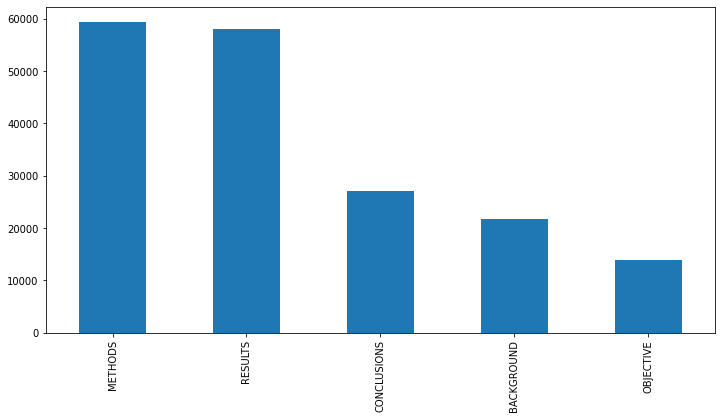

In [16]:
train_df["label"].value_counts().plot.bar(figsize=(12,6))

Có khoảng 5 loại label trong mỗi bản tóm tắt bao gồm `['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND']`. Trong đó, `METHODS` và `RESULTS` chiếm số lượng lớn nhất (~ 60.000 mẫu), còn `OBJECTIVES` chiếm số lượng nhỏ nhất (~ 15.000 mẫu). 

Tiếp theo, chúng ta sẽ quan sát mật độ phân bố số lượng dòng của tất cả các bản tóm tắt:



Số dòng trong tổng số dòng của mỗi bản tóm tắt sau này sẽ giúp chúng ta cải thiện mô hình tốt hơn, cho nên đây là chi tiết quan trọng để mô hình có thể tìm được những liên kết giữa các label. 

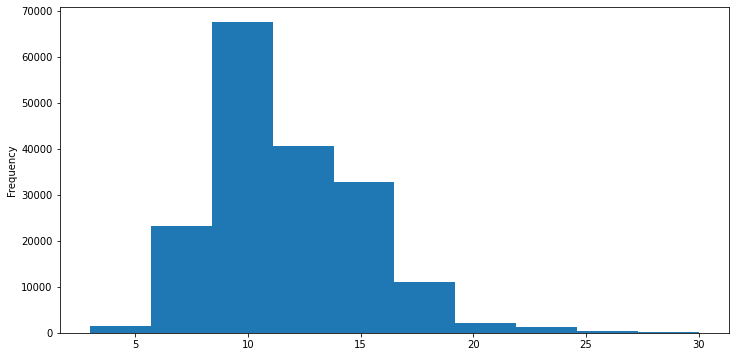

In [17]:
train_df["total_lines"].plot.hist(figsize=(12,6))

Hầu hết số lượng dòng của mỗi bản tóm tắt đều tập trung trong khoảng 6 đến 15 dòng. 

Khi chúng tôi xây dựng mô hình, một trong những input chính được đưa vào mô hình học sẽ là danh sách các chuỗi được mã hóa và nhúng (các dòng của một bản tóm tắt).

 Chúng ta có thể dễ dàng lấy danh sách các câu từ `DataFrame` của mình bằng cách gọi phương thức `tolist()` trên cột `text` của chúng ta.




In [18]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

Chúng ta đã tách các mẫu văn bản thành một danh sách. Như bạn đã biết, mô hình học sẽ chỉ học được dữ liệu dưới dạng số, cho nên chúng ta cần phải mã hóa dữ liệu văn bản hiện tại và nhúng dữ liệu đó trước khi đưa vào mô hình. 

Bên cạnh đó, label khi đưa vào mô hình học cũng phải được mã hóa dưới dạng số, trong khi label trong `DataFrame` vẫn chưa được chuyển. Lưu ý , chúng ta sẽ chuyển label có dạng từ thành dạng số nhưng có 2 kiểu dữ liệu label khác nhau : 
+ `one_hot` : đưa label dưới dạng một mảng gồm nhiều phần tử  để train mô hình, vị trí của label là `1`, còn lại `0`. VD: trong dữ liệu hiện tại có 5 loại label, và giả sử label là `OBJECTIVE` ở vị trí đầu tiên thì khi chuyển one_hot sẽ là `[1,0,0,0,0]`
+ `label-encoded` : đưa label về một giá trị cụ thể nào đó (VD :trong dữ liệu hiện tại có 5 loại label, và giả sử label là `OBJECTIVE` ở vị trí đầu tiên thì label sẽ có giá trị là `0` ), dùng để kiểm định mô hình dự đoán với giá trị thực (ngoài ra còn được áp dụng cho mô hình machine learning, mô hình cơ sở sắp tới).




In [19]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder 

one_hot = OneHotEncoder(sparse=False)


train_labels_one_hot = one_hot.fit_transform(train_df["label"][:,np.newaxis])
val_labels_one_hot = one_hot.fit_transform(val_df["label"][:,np.newaxis])
test_labels_one_hot = one_hot.fit_transform(test_df["label"][:,np.newaxis])

train_labels_one_hot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [20]:
label_encoder = LabelEncoder()
train_labels_encoder = label_encoder.fit_transform(train_df["label"].values)
val_labels_encoder = label_encoder.fit_transform(val_df["label"].values)
test_labels_encoder = label_encoder.fit_transform(test_df["label"].values)

train_labels_encoder

array([3, 2, 2, ..., 4, 1, 1])

Bây giờ chúng ta đã tạo instance của `LabelEncoder`, chúng ta có thể lấy tên lớp và số lớp bằng cách sử dụng thuộc tính `class_`.

In [21]:
class_names = label_encoder.classes_.tolist()
num_classes = len(class_names)
class_names, num_classes

(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'], 5)

## 4. Khởi tạo và train mô hình

Dữ liệu đã được xử lý, đã đến lúc thiết lập một loạt các thử nghiệm mô hình hóa.

Chúng ta sẽ bắt đầu bằng cách tạo một mô hình cơ sở đơn giản để lấy điểm mốc tối thiểu mà những mô hình sau đó có độ phức tạp cao hơn phải vượt qua được số điểm này.  [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

Đối với mỗi mô hình, chúng ta sẽ train nó trên dữ liệu `train` và đánh giá nó trên dữ liệu `val`.

### Model 0 : Mô hình cơ sở (machine learning) train toàn bộ dữ liệu 

Mô hình đầu tiên của chúng ta sẽ là TF-IDF Multinomial Naive Bayes theo đề xuất [Scikit-Learn's machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).


Để xây dựng nó, chúng ta sẽ tạo một Scikit-Learn `Pipeline` sử dụng [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), một lớp để chuyển đổi các câu thành dạng số bằng cách sử dụng thuật toán TF-IDF (term frequency-inverse document frequecy) và sau đó mô hình sẽ phân loại các câu bằng cách sử dụng thuật toán [`MultinomialNB`](https://scikit-learn.org/stable/modules /generated/sklearn.naive_bayes.MultinomialNB.html).


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), 
                    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels_encoder)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Đánh giá `model_0` trên dữ liệu kiểm định `val_sentences` và `val_label`

In [23]:
model_0.score(val_sentences, val_labels_encoder)

0.7218323844829869

Ngoài phương pháp đánh giá độ chính xác trung bình `accuracy` khi làm việc với vấn đề phân loại, chúng ta còn có thể áp dụng phương pháp `precision`, `recall`, và `f1-score` để đánh giá mô hình

![](https://machinelearningcoban.com/assets/33_evaluation/PR.png)

Trước khi đánh giá cả 4 phương pháp, chúng ta cần dự đoán các label dựa trên `val_sentences` 

In [24]:
model_0_pred_labels = model_0.predict(val_sentences)
model_0_pred_labels

array([4, 1, 3, ..., 4, 4, 1])

In [25]:
from utility_functions import calculate_results

In [26]:
baseline_results = calculate_results(val_labels_encoder, model_0_pred_labels )
baseline_results

{'accuracy': 0.7218323844829869,
 'f1-score': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

### Chuẩn bị dữ liệu cho mô hình deep learning

Nhưng trước khi bắt đầu xây dựng các mô hình sâu hơn, chúng ta phải tạo layer vectơ hóa và layer nhúng.

Layer vectơ hóa sẽ chuyển đổi văn bản thành kiểu dữ liệu số và layer nhúng sẽ nắm giữ những mối liên hệ giữa các dữ liệu số đó.

Những thư viện chúng ta sẽ phải import : 

In [27]:
import tensorflow as tf
from tensorflow.keras import Model, layers 
from tensorflow.keras.layers import TextVectorization, Embedding

Vì chúng ta sẽ chuyển các câu của mình thành số, nên bạn cần tìm ra bao nhiêu từ trong mỗi câu.

Khi mô hình đi qua từng câu, nó hoạt động tốt nhất khi  có cùng độ dài như nhau(điều này rất quan trọng để tạo ra các cụm có cùng kích thước).

Ví dụ, nếu một câu dài 8 từ và một câu khác dài 29 từ, chúng ta sẽ chèn câu tám từ bằng các số 0 để nó có cùng độ dài với câu 29 từ.

Do đó, chúng ta sẽ tìm dài trung bình của các câu trong dữ liệu `train`




In [28]:
train_sentence_length = [len(sentence.split()) for sentence in train_sentences]
train_sentence_avg_length = np.mean(train_sentence_length)
train_sentence_avg_length

26.338269273494777

(array([1.25846e+05, 4.78220e+04, 5.37600e+03, 7.86000e+02, 1.46000e+02,
        3.20000e+01, 1.90000e+01, 8.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([  1. ,  30.5,  60. ,  89.5, 119. , 148.5, 178. , 207.5, 237. ,
        266.5, 296. ]),
 <a list of 10 Patch objects>)

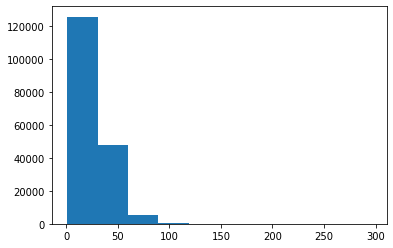

In [29]:
import matplotlib.pyplot as plt
plt.hist(train_sentence_length)

Số từ trong một câu dao động từ 0 - 50, chúng ta sẽ lấy 95% độ dài của từ trong câu để tạo độ dài chuỗi output cho vector hóa 

In [30]:
output_seq_length = np.percentile(train_sentence_length,95)
output_seq_length

55.0

95% số từ trong một câu trong `train_sentences` có độ dài từ 55 tokens trở xuống.

Khi tạo layer mã hóa, chúng ta sẽ sử dụng giá trị này để biến tất cả các câu thành cùng một độ dài. Nghĩa là mỗi một câu sẽ được chuyển thành một ma trần có độ dài  55, câu nào không đủ 55 từ sẽ được chèn thêm số 0 vào vị trí đó và các câu có độ dài trên 55 sẽ bị bỏ đi. 

> 🤔 **Câu hỏi**: Tại sao lại là 95%?

Trong thống kê 95% có nhiều ý nghĩa, nhưng điều quan trọng nhất là nó bỏ đi các giá trị ngoại lai, những giá trị khiến mô hình thống kê mất đi độ chính xác nhiều nhất. 


#### Tạo layer mã hóa văn bản

Chúng ta sẽ định nghĩa layer [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) để khi đưa mô hình, nó sẽ chuyển tất cả inputs thành số. 

tất cả các tham số mặc định được giữ lại ngoại trừ `max_tokens` (số lượng những từ khác nhau trong tập dữ liệu) và` output_sequence_length` (độ dài output mong muốn cho mỗi câu được vector hóa).

Theo tài liệu [Pubmed 200 RTC](https://arxiv.org/pdf/1612.05251.pdf) cho biết kích thước từ vựng của tập dữ liệu PubMed 20k là 68.000, vì vậy `max_tokens` sẽ là 68.000

In [31]:
MAX_TOKENS = 68000 #@param {type:"slider", min:60000, max:70000, step:1000}

In [32]:
text_vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS, 
    output_sequence_length=int(output_seq_length)
)

sử dụng phương thức `adapt()` để instance `text_vectorizer` đưa danh sách các từ từ dữ liệu `train` vào trong nó. 

In [33]:
text_vectorizer.adapt(train_sentences)

Như vậy `text_vectorizer` đã ghi lại danh sách các từ và nó sẽ sắp xếp tuần suất của những từ đó trong câu theo thứ tự từ cao xuống thấp. 

In [34]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Số từ khác nhau : {len(rct_20k_text_vocab)}")
print(f"Những từ được sử dụng nhiều nhất : {rct_20k_text_vocab[:10]}")
print(f"Những từ được sử dụng ít nhất : {rct_20k_text_vocab[-10:]}")

Số từ khác nhau : 64841
Những từ được sử dụng nhiều nhất : ['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']
Những từ được sử dụng ít nhất : ['aarm', 'aaqol', 'aaq', 'aanhui', 'aana', 'aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [35]:
import random
random_training_sentence = random.choice(train_sentences)
vectorized_sentence = text_vectorizer([random_training_sentence])
print(f"origin sentence : {random_training_sentence}")
print(f"Vectorized sentence : {vectorized_sentence}")
print(f"Vectorized sentence Shape : {vectorized_sentence.shape}")

origin sentence : results for other outcomes were mixed with no differences in several measures .
Vectorized sentence : [[117  11 168  75   9 832   7  33 102   5 881 213   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]]
Vectorized sentence Shape : (1, 55)


Và nếu bạn muốn tìm cấu hình của `text_vectorizer` thì có thể sử dụng phương thức `get_config()`

In [36]:
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True}

#### Tạo layer nhúng dữ liệu được mã hóa

Layer `token_vectorization` có chỉ có chức năng mã hóa văn bản, hay có thể hiểu là văn bản được ánh xạ trực tiếp thành các con số, nó không nắm được mối liên hệ giữa các con số. 

Để tạo cho những văn bản được mã hóa này được phong phú hơn, chi tiết hơn các đặc điểm của token, chúng ta cần sử dụng phương pháp **nhúng**.

Khi mô hình học (bằng cách xem qua nhiều mẫu dữ liệu khác nhau trong các câu và label), layer nhúng có chức năng cập nhật mối liên hệ giữa các token để nó có thể cải thiện tốt hơn. 

Chúng ta có thể tạo một layer với  [`Embedding`](https://www.tensorflow.org/tutorials/text/word_embeddings) trong TensorFlow.

Một số tham số trong layer này cần quan tâm : 

+ `input_dim` : Xác định kích thước của từ khác nhau trong văn bản. 
+ `output_dim` : Kích thước output của đầu ra
+ `input_length` : Độ dài của mỗi một văn bản được chuyển thành token (VD : 55). Nó thường bằng với `output_sequence_length` của `text_vectorizer` 

Layer nhúng sẽ lấy các inputs từ `text_vectorizer` layer và chuyển đổi chúng thành các vectơ đặc trưng có kích thước` output_dim`.


In [37]:
token_embed = Embedding(input_dim=len(text_vectorizer.get_vocabulary()),
                        input_length=output_seq_length, 
                        mask_zero=True, # Sử dụng mask để xử lý độ dài chuỗi thay đổi (tiết kiệm dung lượng)
                        output_dim=300
                      )


In [38]:
print(f"Origin sentece : {random_training_sentence}\n\n")
print(f"Vectorized sentence : {vectorized_sentence}")
print(f"Vectorized sentence shape : {vectorized_sentence.shape}\n\n")
print(f"Embedded sentence : {token_embed(vectorized_sentence)}")
print(f"Embedded sentence shape : {token_embed(vectorized_sentence).shape}")

Origin sentece : results for other outcomes were mixed with no differences in several measures .


Vectorized sentence : [[117  11 168  75   9 832   7  33 102   5 881 213   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]]
Vectorized sentence shape : (1, 55)


Embedded sentence : [[[-0.0471453   0.00827867  0.02207244 ...  0.04793492 -0.00345132
    0.02792015]
  [-0.03746655  0.04896399  0.00033245 ...  0.00828452 -0.02570326
   -0.03078792]
  [-0.00778638 -0.0198203  -0.0377888  ... -0.04458637  0.00299859
   -0.00095188]
  ...
  [-0.04543149 -0.01877358 -0.00513818 ...  0.01727045  0.00893285
    0.03257588]
  [-0.04543149 -0.01877358 -0.00513818 ...  0.01727045  0.00893285
    0.03257588]
  [-0.04543149 -0.01877358 -0.00513818 ...  0.01727045  0.00893285
    0.03257588]]]
Embedded sentence shape : (1, 55, 300)


#### Tạo bộ dữ liệu phân cụm

Chúng tôi đã trải qua tất cả khó khăn nhất khi xử lý dữ liệu. Nhưng nếu cứ để một lượng dữ liệu lớn như vậy đưa vào mô hình train, sẽ có những hạn chế khiến mô hình train chậm hơn, kém hiệu quả hơn và đặc biệt có thể làm bộ nhớ không đủ khả năng lưu trữ. 

Để giúp cho mô hình có thể train tối ưu các hạn chế trên, chúng ta cần phân tán dữ liệu thành từng cụm, mỗi cụm chứa khoảng 32 mẫu dữ liệu chẳng hạn như vậy. Thì khi mô hình tiến hành train, nó không train liên tục tất cả dữ liệu, mà lúc này nó sẽ xử lý từng cụm, tức là xử lý 32 mẫu dữ liệu tại một thời điểm. Sau khi xử lý xong, nó sẽ đi qua cụm tiếp theo và cứ như vậy cho đến khi kết thúc. Ngoài ra, khi mô hình tiến hành xử lý cụm này, thì dữ liệu trong cụm tiếp theo sẽ được chuẩn bị để khi cụm này xử lý xong thì ngay lập tức cụm sau nối tiếp mà không cần phải mất thời gian chờ chuẩn bị. 

Cụ thể, API `tf.data` sẽ cung cấp các phương pháp cho phép tải dữ liệu nhanh hơn.

> 📖 **Tham khảo:** Để biết các phương pháp tốt nhất về load dữ liệu trong TensorFlow, hãy xem phần sau:
> * [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)
> * [Better performance with the tf.data API](https://www.tensorflow.org/guide/data_performance)

Đảm bảo TensorFlow load dữ liệu lên GPU nhanh nhất có thể, từ đó dẫn đến thời gian train nhanh hơn.

- Để phân tán dữ liệu thành từng cụm, sử dụng [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch)
- Để chuẩn bị dữ liệu cho quá trình xử lý tiếp theo trong khi mô hình vẫn đang train cụm dữ liệu hiện tại sử dụng [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) với tham số [`tf.data.AUTOTUNE`](https://www.tensorflow.org/api_docs/python/tf/data#AUTOTUNE) 


In [39]:
# sử dụng `from_tensor_slices` để gộp 2 loại dữ liệu vào 1 tuple
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))
train_dataset, val_dataset, test_dataset

(<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>,
 <TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>,
 <TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>)

In [40]:
BATCH_SIZE=32 # Vì dữ liệu dưới dạng văn bản khá nhẹ so với dữ liệu hình ảnh, chúng ta có thể lấy kích thước lớn hơn
# Phân tán dữ liệu thành từng cụm và tối ưu quá trình chuẩn bị cho cụm tiếp theo với prefetch 
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000).prefetch(tf.data.AUTOTUNE) # rieeng với train_dataset có thể xáo trộn dữ liệu 
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, val_dataset, test_dataset

(<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>,
 <PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>,
 <PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>)

### Model 1: Deep learning Conv1D với layer nhúng token trong câu với 20% dữ liệu

Mô hình đầu tiên chúng ta sẽ xây dựng là Convolution Neural Network 1 chiều.

Tất cả các mô Deep learning đối với dữ liệu văn bản sẽ tuân theo cấu trúc tương tự:

```Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)```

Các bước thực hiện theo quy trình học máy tiêu chuẩn : 
+ Xây dựng mô hình
+ Train mô hình
+ Đánh giá mô hình (đưa ra dự đoán và so sánh với giá trị thưc)

In [41]:
# Tạo mô hình CNN 1D để xử lý trình tự
inputs = layers.Input(shape=(1,), dtype="string")
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
conv1d_layer = layers.Conv1D(filters=256, kernel_size=5, activation="relu")(token_embeddings)
max_pool_layer = layers.GlobalMaxPool1D()(conv1d_layer)
outputs = layers.Dense(num_classes, activation="softmax")(max_pool_layer)
model_1 = Model(inputs, outputs)

# Biên dich mô hình
model_1.compile(
    loss="categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

Tổng quan kiến trúc `model_1` : 

In [42]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
embedding (Embedding)        (None, 55, 300)           19452300  
_________________________________________________________________
conv1d (Conv1D)              (None, 51, 256)           384256    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1285      
Total params: 19,837,841
Trainable params: 19,837,841
Non-trainable params: 0
_________________________________________________

Việc Kiểm tra tổng quan mô hình sẽ giúp bạn nhận thấy phần lớn các tham số có thể train nằm trong layer `embedding`. Nếu chúng ta tăng kích thước của việc nhúng (bằng cách tăng tham số `output_dim` của layer Embedding), số lượng các tham số có thể train sẽ tăng lên đáng kể.

Vì dữ liệu train chứa gần 200.000 câu, nên quá trình train của mô hình có thể mất một lúc ngay cả với GPU. Vì vậy, để giữ cho các thử nghiệm diễn ra nhanh chóng, chúng ta sẽ chạy chúng trên một tập dữ liệu con của tập dữ liệu train.

Cụ thể hơn, chúng ta sẽ chỉ sử dụng 20% cụm đầu tiên (khoảng 35.000 dữ liệu mẫu) của bộ train và 10% cụm đầu tiên của tập dũ liệu `val_dataset` để kiểm định quá trình học của mô hình. 

> 🔑 **Lưu ý** : Chia nhỏ dữ liệu train là phương pháp tiêu chuẩn trong học máy để kiểm tra các mô hình của bạn có hoạt động đúng như mong muốn hay không trước khi train với dữ liệu lớn hơn. Bạn nên đặt mục tiêu chạy nhiều thử nghiệm nhỏ hơn thay vì chỉ một số ít các thử nghiệm lớn. Một trong những cách tốt nhất để chạy các thử nghiệm nhỏ hơn là giảm lượng dữ liệu bạn đang làm việc (10% - 20% của tập dữ liệu đầy đủ thường là một số lượng tốt, miễn là nó bao gồm đầy đủ thông tin có trong dữ liệu đầy đủ).

In [43]:
model_1_history = model_1.fit(
    train_dataset,
    steps_per_epoch=int(0.2 * len(train_dataset)), # thiết lập 20% dữ liệu train tại đây
    epochs=5, 
    validation_data=val_dataset,
    validation_steps=int(0.1 * len(val_dataset))
)

Epoch 1/5
1125/1125 [==============================] - 60s 25ms/step - loss: 0.6629 - accuracy: 0.7508 - val_loss: 0.5411 - val_accuracy: 0.7892
Epoch 2/5
1125/1125 [==============================] - 28s 25ms/step - loss: 0.5434 - accuracy: 0.8006 - val_loss: 0.5056 - val_accuracy: 0.8088
Epoch 3/5
1125/1125 [==============================] - 28s 25ms/step - loss: 0.5148 - accuracy: 0.8111 - val_loss: 0.5029 - val_accuracy: 0.8145
Epoch 4/5
1125/1125 [==============================] - 28s 25ms/step - loss: 0.5131 - accuracy: 0.8109 - val_loss: 0.4677 - val_accuracy: 0.8295
Epoch 5/5
1125/1125 [==============================] - 28s 25ms/step - loss: 0.4899 - accuracy: 0.8225 - val_loss: 0.4883 - val_accuracy: 0.8145


In [44]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 6s 6ms/step - loss: 0.4856 - accuracy: 0.8135


[0.4855518341064453, 0.8134515881538391]

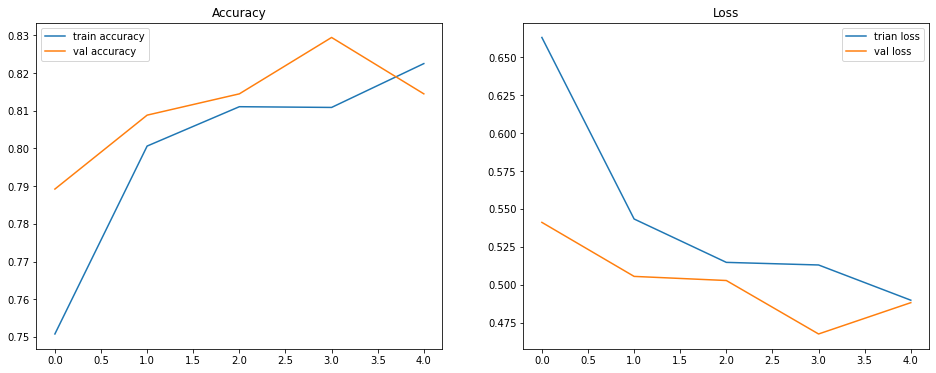

In [45]:
from utility_functions import plot_loss_curves 
plot_loss_curves(model_1_history)

Mô hình có khả năng dự đoán chính xác ~82% trên tập dữ liệu kiểm định (dữ liệu chưa được học). Và quan sát trên biểu đồ learning curves, 2 đường train và test có hướng di chuyển khá tương đồng với nhau nên không xảy ra hiện tượng `overfitting` hoặc `underfitting`

Chúng ta sẽ đánh giá bằng 4 phương pháp, nhưng trước tiên cần dự đoán label của dữ liệu kiểm định

In [46]:
model_4_pred_probs = model_1.predict(val_dataset, verbose=1)
model_4_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[2.6840132e-01, 3.1499156e-01, 1.3662837e-02, 3.8729855e-01,
        1.5645782e-02],
       [2.2723265e-01, 2.4734086e-01, 6.1619026e-04, 5.2137512e-01,
        3.4352099e-03],
       [1.0594544e-01, 3.9630681e-03, 3.7941005e-04, 8.8968486e-01,
        2.7266067e-05],
       ...,
       [1.6134480e-05, 3.7915667e-04, 3.8358234e-03, 3.2569085e-05,
        9.9573624e-01],
       [3.2728653e-02, 6.6263878e-01, 4.2857803e-02, 5.0014637e-02,
        2.1176016e-01],
       [1.5142208e-03, 9.9549723e-01, 1.1576720e-03, 1.6296525e-04,
        1.6678977e-03]], dtype=float32)

In [47]:
model_4_pred_probs.shape

(30212, 5)

Tập dữ liệu kiểm định `val_dataset` có 30212 phần tử tương ứng 3012 câu, mỗi phần tử là một mảng gồm 5 phần tử thể hiện giá trị xác suất xảy ra cho mỗi label. Chúng ta sẽ lấy vị trí có giá trị xác suất cao nhất trong mảng con này.

In [48]:
model_1_pred_labels = tf.argmax(model_4_pred_probs,axis=1).numpy()
model_1_pred_labels

array([3, 3, 3, ..., 4, 1, 1])

Sau khi có đủ label dự đoán và label thực trong tập dữ liệu kiểm định, lúc này chúng ta có thể đánh khả năng dự đoán của mô hình vơi 4 phương pháp trong phân loại

In [49]:
model_1_results = calculate_results(val_labels_encoder, model_1_pred_labels)
model_1_results

{'accuracy': 0.8134516086323316,
 'f1-score': 0.8065543917888655,
 'precision': 0.8165749000298814,
 'recall': 0.8134516086323316}

### Model 2 : Deep learning Conv1D với layer nhúng ký tự trong câu với 20% dữ liệu

Với model 1, chúng ta sẽ mã hóa từng từ trong câu thành các token, sau đó nhúng bộ mã hóa đó để tạo những mối liên kết giữa các token với nhau. Ngoài ra, chúng ta còn có thể mã hóa từng ký tự trong một câu thay vì từng từ như `model_1`. Trong mục này, chúng ta sẽ thử nghiệm với trường hợp này. 

Bước đầu tiên, mọi câu trong văn bản cần phải tách ra thành từng ký tự thay vì từng từ

In [50]:
def split_chars(text) : 
  return " ".join(list(text))
split_chars(random_training_sentence)

'r e s u l t s   f o r   o t h e r   o u t c o m e s   w e r e   m i x e d   w i t h   n o   d i f f e r e n c e s   i n   s e v e r a l   m e a s u r e s   .'

In [51]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [ split_chars(sentence) for sentence in val_sentences]
test_chars = [ split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

Chúng ta cần xác định giá `max_tokens` là bao nhiêu ? Nếu là từ thì có sẽ có rất nhiều từ khác nhau trong một câu cho đến trong một văn bản. Nhưng nếu là ký tự thì chỉ có 26 chữ cái, thêm vào đó là ký tự đặc biệt. Vì vậy chúng ta sẽ liệt kê các ký tự khác nhau bao gồm chữ cái với module `string`. Lưu ý, chúng ta đã chuyển câu thành ký tự thường trong phần `preprocess_text` nên không cần lấy ký tự in hoa. 

In [52]:
import string 

alphabets = string.ascii_lowercase + string.punctuation + string.digits
alphabets

'abcdefghijklmnopqrstuvwxyz!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [53]:
MAX_CHAR_TOKENS = len(alphabets) + 2 ## Bao gồm khoảng trắng và  OOV token

Tiếp theo, `output_sequence_length` để xác định kích thước output cho bộ mã hóa ký tự. Chúng ta cần xác định độ dài của các ký tự trong mỗi câu của văn bản.

In [54]:
train_chars_length = [len(sentence) for sentence in train_sentences]
train_chars_avg_length = np.mean(train_chars_length)
train_chars_avg_length

149.3662574983337

(array([9.2691e+04, 7.6343e+04, 9.6890e+03, 1.0890e+03, 1.6700e+02,
        4.2000e+01, 1.3000e+01, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.3950e+02, 2.7800e+02, 4.1650e+02, 5.5500e+02,
        6.9350e+02, 8.3200e+02, 9.7050e+02, 1.1090e+03, 1.2475e+03,
        1.3860e+03]),
 <a list of 10 Patch objects>)

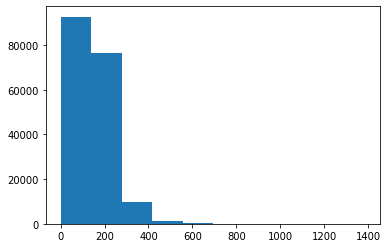

In [55]:
plt.hist(train_chars_length)

Trong mỗi câu, có trung bình ~150 từ, và tập trung nhiều nhất trong khoảng [0-250] chúng ta sẽ tìm khoảng 95% số từ sẽ là bao nhiêu 

In [56]:
output_seq_length = np.percentile(train_chars_length, 95).astype("int")
output_seq_length

290

Sau khi có 2 tham số trên đủ để tạo instance cho `TextVectorization` 

In [57]:
char_vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS, 
    output_sequence_length=int(output_seq_length),    
)

In [58]:
char_vectorizer.adapt(train_chars)

In [59]:
chars_20k_rtc_vocab = char_vectorizer.get_vocabulary()
print(f"Số ký tự được vector hóa :{len(chars_20k_rtc_vocab)}")
print(f"Những ký tự xuất hiện nhiều nhất: {chars_20k_rtc_vocab[:10]}")
print(f"Những ký tự xuất hiện ít nhất: {chars_20k_rtc_vocab[-10:]}")

Số ký tự được vector hóa :28
Những ký tự xuất hiện nhiều nhất: ['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']
Những ký tự xuất hiện ít nhất: ['g', 'y', 'w', 'v', 'b', 'k', 'x', 'z', 'q', 'j']


Giống như bộ nhúng mã hóa token, chúng ta cũng tạo bộ nhúng mã hóa các ký tự với  [`tensorflow.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding). 

`input_dim` sẽ bằng số ký tự khác nhau trong `char_vocab` (28). Và vì chúng ta đang theo cấu trúc của mô hình trong Hình 1 [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) nên kích thước output của ký tự nhúng (`output_dim`) là 25



In [60]:
char_embed = Embedding(
    input_dim=len(char_vectorizer.get_vocabulary()), 
    input_length=output_seq_length, 
    output_dim=25
)

Chúng ta đã tạo được 2 layer giúp chuyển đổi ký tự thành thành dạng số, và nhúng các những bản số này để tạo mối liên hệ giữa chúng với nhau. Trước khi xây dựng mô hình, nên thử một mẫu với 2 layer này :

In [61]:
import random 
random_train_chars = random.choice(train_chars)
print(f"Chuỗi ký tự ban đầu :{random_train_chars}\n\n")
vectorized_train_chars_example = char_vectorizer([random_train_chars])
print(f"Chuỗi ký tự được mã hóa : {vectorized_train_chars_example}")
print(f"Kích thước chuỗi ký tự được mã hóa :{vectorized_train_chars_example.shape}\n\n")
embed_train_chars_exaple = char_embed(vectorized_train_chars_example)
print(f"Nhúng chuỗi ký tự được mã hóa: {embed_train_chars_exaple} ")
print(f"Kích thước bản nhúng chuỗi ký tự được mã hóa: {embed_train_chars_exaple.shape} ")

Chuỗi ký tự ban đầu :b o t h   g r o u p s   w e r e   c o n t a c t e d   a f t e r   t h e i r   f r a c t u r e   a n d   w e r e   a s k e d   t o   a n s w e r   a   q u e s t i o n n a i r e   a n d   w e r e   i n f o r m e d   a b o u t   t h e   p o s s i b l e   r e l a t i o n s h i p   b e t w e e n   d r f   a n d   o p   .


Chuỗi ký tự được mã hóa : [[22  7  3 13 18  8  7 16 14  9 20  2  8  2 11  7  6  3  5 11  3  2 10  5
  17  3  2  8  3 13  2  4  8 17  8  5 11  3 16  8  2  5  6 10 20  2  8  2
   5  9 23  2 10  3  7  5  6  9 20  2  8  5 26 16  2  9  3  4  7  6  6  5
   4  8  2  5  6 10 20  2  8  2  4  6 17  7  8 15  2 10  5 22  7 16  3  3
  13  2 14  7  9  9  4 22 12  2  8  2 12  5  3  4  7  6  9 13  4 14 22  2
   3 20  2  2  6 10  8 17  5  6 10  7 14  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0 

Cool, Bây giờ chúng ta đã có một cách để biến các chuỗi cấp độ ký tự của chúng ta thành số (char_vectorizer) cũng như biểu diễn chúng bằng số dưới dạng nhúng (char_embed). Tiếp theo chúng ta sẽ tiến hành khởi tạo và train mô hình.

Mô hình sẽ có cấu trúc giống như mô hình nhúng mã token (`model_1`) ngoại trừ nó sẽ lấy chuỗi cấp ký tự làm input thay vì chuỗi cấp token.



In [62]:
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
conv1d_layer = layers.Conv1D(filters=128, kernel_size=5, activation="relu")(char_embeddings)
max_pool_layer = layers.GlobalMaxPool1D()(conv1d_layer)
outputs = layers.Dense(num_classes, activation="softmax")(max_pool_layer)

model_2 = Model(inputs, outputs)

model_2.compile(
    loss="categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

In [63]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 290)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 290, 25)           700       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 286, 128)          16128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_______________________________________________________

Có thể thấy số tham số có thể train trong `model_2` rất nhỏ so với `model_1` vì danh sách từ trong layer nhúng chỉ có 28 so với >64.000 của `model_1`. 

Trước khi train mô hình, chúng ta đưa tập dữ liệu phân tán theo từng cụm giống như cách đã làm trong `model_1` 

In [64]:
BATCH_SIZE=32

train_chars_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(BATCH_SIZE).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_chars_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_chars_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_chars_dataset, val_chars_dataset, test_chars_dataset

(<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>,
 <PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>,
 <PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>)

In [65]:
model_2_history = model_2.fit(
    train_chars_dataset, 
    steps_per_epoch=int(0.2 * len(train_chars_dataset)), 
    epochs=5, 
    validation_data= val_chars_dataset, 
    validation_steps=int(0.1*len(val_chars_dataset))
)

Epoch 1/5
1125/1125 [==============================] - 13s 11ms/step - loss: 1.0808 - accuracy: 0.5664 - val_loss: 0.8854 - val_accuracy: 0.6439
Epoch 2/5
1125/1125 [==============================] - 12s 10ms/step - loss: 0.8431 - accuracy: 0.6709 - val_loss: 0.7859 - val_accuracy: 0.6928
Epoch 3/5
1125/1125 [==============================] - 12s 11ms/step - loss: 0.7858 - accuracy: 0.6972 - val_loss: 0.7302 - val_accuracy: 0.7234
Epoch 4/5
1125/1125 [==============================] - 12s 11ms/step - loss: 0.7505 - accuracy: 0.7131 - val_loss: 0.7122 - val_accuracy: 0.7277
Epoch 5/5
1125/1125 [==============================] - 12s 11ms/step - loss: 0.7259 - accuracy: 0.7240 - val_loss: 0.6957 - val_accuracy: 0.7360


In [66]:
model_2.evaluate(val_chars_dataset)

945/945 [==============================] - 6s 6ms/step - loss: 0.6983 - accuracy: 0.7362


[0.6983143091201782, 0.7361975312232971]

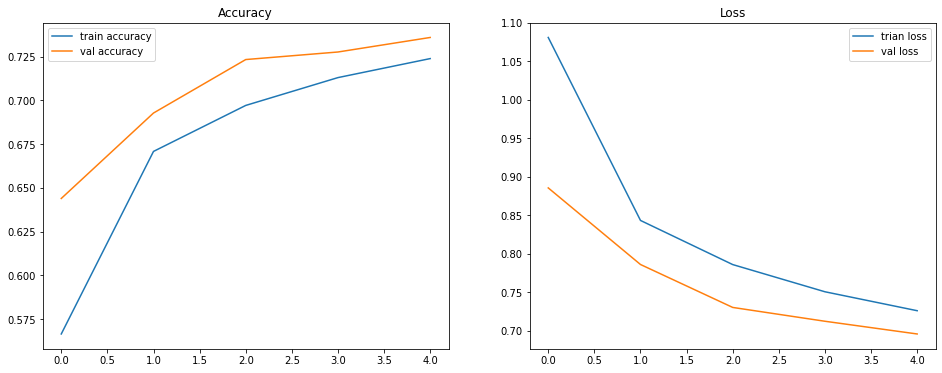

In [67]:
plot_loss_curves(model_2_history)

Khả năng dự đoán của mô hình trên tập dữ liệu kiểm định `val_dataset` đã được chuyển thành ký tự trong câu ~73%, khá thấp so với mô hình trước. 

Dự đoán xác suất với tập dữ liệu kiểm định đã được chuyển thành ký tự

In [68]:
model_2_pred_probs = model_2.predict(val_chars_dataset, verbose=1)
model_2_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.25148502, 0.46842912, 0.03696045, 0.23571391, 0.00741157],
       [0.1982581 , 0.7365472 , 0.0013997 , 0.04525565, 0.0185394 ],
       [0.14428805, 0.08040813, 0.02530293, 0.74279815, 0.00720281],
       ...,
       [0.01004212, 0.01647402, 0.06773176, 0.01475533, 0.89099675],
       [0.04501824, 0.10039485, 0.52687424, 0.05572644, 0.27198622],
       [0.22873226, 0.6475133 , 0.10686341, 0.01331619, 0.00357494]],
      dtype=float32)

In [69]:
model_2_pred_labels = tf.argmax(model_2_pred_probs, axis=1).numpy()
model_2_pred_labels

array([1, 1, 3, ..., 4, 2, 1])

Đánh giá khả năng dự đoán của mô hình phân loại với 4 phương pháp,

In [70]:
model_2_results = calculate_results(val_labels_encoder, model_2_pred_labels)
model_2_results

{'accuracy': 0.7361975374023567,
 'f1-score': 0.7335719794528628,
 'precision': 0.7350226954506693,
 'recall': 0.7361975374023567}

### Model 3 : Sử dụng bộ nhúng token đã được train trước đó với 20% dữ liệu

Vì chúng ta đang hướng tới việc tái tạo kiến ​​trúc mô hình [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), nó đề cập đến việc họ đã sử dụng  [pretrained GloVe embedding](https://nlp.stanford.edu/projects/glove/) được train trước như một cách để khởi tạo bộ nhúng token. 

Để mô phỏng điều này,chúng ta sẽ sử dụng bộ nhúng token e [ Universal Sentence Encoder embeddings](https://tfhub.dev/google/universal-sentence-encoder/4)

> Bạn có thể sử dụng bộ nhúng token [GloVe embeddings](https://keras.io/examples/nlp/pretrained_word_embeddings/) theo như chỉ dẫn từ [Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts](https://arxiv.org/pdf/1612.05251.pdf)


Cấu trúc mô hình sẽ giống như sau:
```
Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)
```

Bạn sẽ nhận thấy thiếu lớp mã hóa văn bản `text_vectorizer` mà chúng tôi đã sử dụng trong mô hình trước đó. Điều này là do `USE` đã mã hóa trước khi nhúng dữ liệu dùm chúng ta. 

Loại mô hình này được gọi là transfer learning, hay cụ thể hơn là **transfer learning trích xuất đặc trưng**. Nói cách khác, lấy các mẫu mà một mô hình đã được train ở nơi khác và áp dụng nó vào vấn đề của chính chúng ta.

![TensorFlow Hub Universal Feature Encoder feature extractor model we're building](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-model-tf-hub-USE-to-dense-layer.png)
*Mô hình trình trích xuất đặc trưng mà chúng ta đang xây dựng bằng cách sử dụng phương pháp nhúng được đào tạo trước từ TensorFlow Hub.*


In [71]:
import tensorflow_hub as hub 
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4")

USE layer đã được train đã  được tải xuống và khởi tạo dưới dạng cá thể hub.KerasLayer, chúng ta thử nghiệm nó trên một câu ngẫu nhiên.

In [72]:
print(f"Random training sentence : {random_training_sentence}")
random_sentence_embeddings_example = tf_hub_embedding_layer([random_training_sentence])
print(f"Embedded random sentence : {random_sentence_embeddings_example[0][:20]}")
print(f"Embedded random sentence shape : {random_sentence_embeddings_example.shape}")

Random training sentence : results for other outcomes were mixed with no differences in several measures .
Embedded random sentence : [-0.05078599 -0.02508917 -0.03489947  0.00267961  0.06034454 -0.02412634
 -0.05086981  0.02798234 -0.01563233  0.07969769 -0.00398502  0.01326018
  0.06402071  0.04782172  0.01156459 -0.00723527 -0.01015743  0.02014014
 -0.01752777  0.00472679]
Embedded random sentence shape : (1, 512)


layer USE quan tâm đến việc mã hóa văn bản và nhúng các vecto mã hóa để tạo  ra output với số chiều là 512.

Bây giờ xây dựng mô hình thôi : 

In [73]:
inputs = layers.Input(shape=(), dtype="string")
token_embeddings = tf_hub_embedding_layer(inputs)
dense_layer = layers.Dense(200, activation="relu")(token_embeddings)
outputs = layers.Dense(num_classes, activation="softmax")(dense_layer)

model_3 = Model(inputs, outputs)

model_3.compile(
    loss="categorical_crossentropy", 
    optimizer="adam",
    metrics=["accuracy"]
)

In [74]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_2 (Dense)              (None, 200)               102600    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1005      
Total params: 256,901,429
Trainable params: 103,605
Non-trainable params: 256,797,824
_________________________________________________________________


Trong mô hình này, chúng ta sẽ sử dụng bộ dữ liệu chuyển đổi văn bản thành token tương tự như `model_1`.

In [75]:
model_3_history = model_3.fit(
    train_dataset, 
    steps_per_epoch=int(0.2*len(train_dataset)),
    epochs=5, 
    validation_data=val_dataset, 
    validation_steps=int(0.1 * len(val_dataset))
)

Epoch 1/5
1125/1125 [==============================] - 24s 19ms/step - loss: 0.8342 - accuracy: 0.6777 - val_loss: 0.7477 - val_accuracy: 0.7134
Epoch 2/5
1125/1125 [==============================] - 21s 19ms/step - loss: 0.7263 - accuracy: 0.7213 - val_loss: 0.6899 - val_accuracy: 0.7387
Epoch 3/5
1125/1125 [==============================] - 21s 19ms/step - loss: 0.7011 - accuracy: 0.7308 - val_loss: 0.6613 - val_accuracy: 0.7453
Epoch 4/5
1125/1125 [==============================] - 21s 19ms/step - loss: 0.6655 - accuracy: 0.7452 - val_loss: 0.6382 - val_accuracy: 0.7586
Epoch 5/5
1125/1125 [==============================] - 21s 19ms/step - loss: 0.6592 - accuracy: 0.7490 - val_loss: 0.6305 - val_accuracy: 0.7593


In [76]:
model_3.evaluate(val_dataset)

945/945 [==============================] - 17s 18ms/step - loss: 0.6392 - accuracy: 0.7562


[0.6392302513122559, 0.756222665309906]

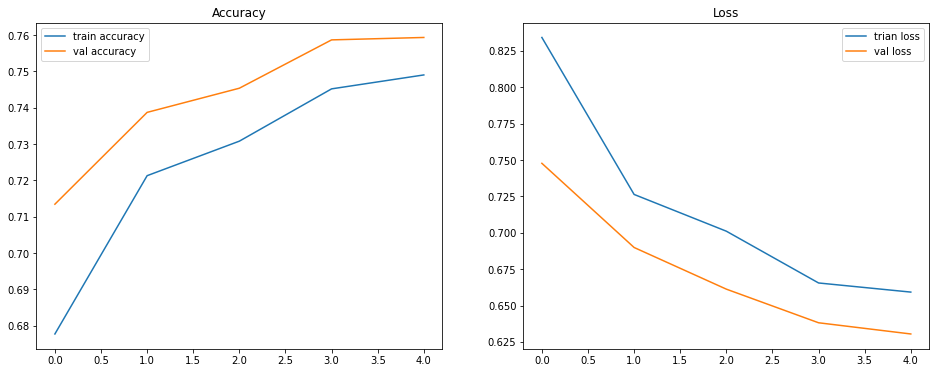

In [77]:
plot_loss_curves(model_3_history)

Với 20% dữ liệu train trong mỗi epoch, mô hình dự đoán trên tập dữ liệu kiểm định đạt độ chính xác ~75%.

Dự đoán label của từ các câu trong dữ liệu kiểm định 



In [78]:
model_3_pred_probs = model_3.predict(val_dataset,verbose=1)
model_3_pred_probs

945/945 [==============================] - 15s 16ms/step


array([[5.58147371e-01, 2.93077797e-01, 3.16932186e-04, 1.43710300e-01,
        4.74753557e-03],
       [4.35469866e-01, 4.56002921e-01, 3.03056650e-03, 1.04606025e-01,
        8.90609052e-04],
       [4.83765155e-01, 2.95735504e-02, 2.99987681e-02, 4.39995527e-01,
        1.66669544e-02],
       ...,
       [6.65313564e-04, 4.55319474e-04, 1.52931148e-02, 1.34073460e-04,
        9.83452141e-01],
       [8.02398846e-03, 5.20799868e-02, 1.90680534e-01, 1.96691253e-03,
        7.47248590e-01],
       [8.03453326e-02, 8.61115038e-01, 5.50645627e-02, 4.54679102e-04,
        3.02041462e-03]], dtype=float32)

In [79]:
model_3_pred_labels = tf.argmax(model_3_pred_probs, axis=1).numpy()
model_3_pred_labels

array([0, 1, 0, ..., 4, 4, 1])

In [80]:
model_3_results = calculate_results(val_labels_encoder, model_3_pred_labels)
model_3_results

{'accuracy': 0.7562226929696809,
 'f1-score': 0.7513187977066608,
 'precision': 0.7504646335457706,
 'recall': 0.7562226929696809}

### Model 4 : Kết hợp bộ nhúng token được train trước đó và bộ nhúng ký tự (nhúng kết hợp)

Khi tiến gần hơn đến việc xây dựng một mô hình tương tự như trong Hình 1 của [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), đã đến lúc chúng ta giải quyết layer nhúng kết hợp mà họ nói đến.

Layer nhúng kết hợp này là sự kết hợp của bộ nhúng token và nhúng ký tự. Nói cách khác, chúng ta sẽ tạo ra một bộ nhúng xếp chồng lên nhau để đại diện cho các trình tự trước khi chuyển chúng đến layer output.

Cho đến nay, chúng ta đã xây dựng hai mô hình sử dụng layer nhúng token và nhúng cấp độ ký tự. Tuy nhiên, hai mô hình này đã sử dụng riêng cho từng cách nhúng này.

Chúng ta sẽ mô phỏng (tái tạo) mô hình trong Hình 1, bằng cách thực hiện các bước sau:
1. Tạo mô hình với layer nhúng token (tương tự như `model_1`)
2. Tạo mô hình với layer nhúng ký tự sử dụng RNN(tương tự như `model_2`)
3. Kết hợp (sử dụng [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) output của 2 mô hình trên 
4. Xây dựng một loạt các layer phái trên cùng của 3 layer tương tự như Hình 1 và phần 4.2 của  [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
5. Xây dựng một mô hình lấy chuỗi token và cấp độ ký tự làm input và tạo ra xác suất cho các label như một output


In [81]:
# Tạo mô hình với layer nhúng token (tương tự như model_1)
token_inputs = layers.Input(shape=(),dtype="string")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(300, activation="relu")(token_embeddings)
token_model = Model(token_inputs, token_outputs)

# Tạo mô hình với layer nhúng ký tự sử dụng RNN (tương tự như `model_2`)
char_inputs = layers.Input(shape=(1,) , dtype="string")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = Model(char_inputs, char_bi_lstm)

hybrid_token_embeddings = layers.Concatenate(name="hybrid_token_embeddings")([token_model.output, char_model.output])

combined_dropout = layers.Dropout(0.5)(hybrid_token_embeddings)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
outputs = layers.Dense(num_classes, activation="softmax")(final_dropout)

model_4 = Model(inputs=[
                        token_model.input,
                        char_model.input
], outputs= outputs)

model_4.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

Tổng quan kiến trúc mô hình

In [82]:
model_4.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
text_vectorization_1 (TextVecto (None, 290)          0           input_5[0][0]                    
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 512)          256797824   input_4[0][0]                    
____________________________________________________________________________________________

Kiến trúc mô hình có vẻ phức tạp, rất khó để có thể thấy được sự kết hợp của 2 mô hình, chúng ta sẽ sử dụng `plot_model` của  tensorflow để có thể nhìn rõ hơn về sự kết hợp này :

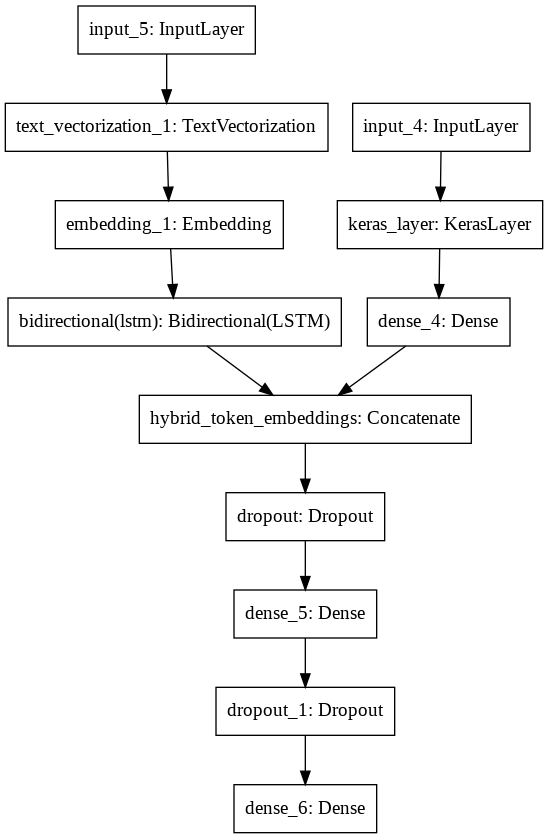

In [83]:
from tensorflow.keras.utils import plot_model

plot_model(model_4)

Có thể thấy kiến trúc kết hợp 2 mô hình này đã giống như mô tả. 

Trước khi train mô hình, chúng ta cần phải tạo tập dữ liệu. Vì đây là mô hình kết hợp giữa nhúng token và nhúng dựa trên ký tự nên tập dữ liệu mới cần chứa cả 2 tập dữ liệu trên.

In [84]:
train_token_chars_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_labels_dataset = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_hybrid_token_embeddings_dataset = tf.data.Dataset.zip((train_token_chars_dataset, train_labels_dataset)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_token_chars_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_labels_dataset = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_hybrid_token_embeddings_dataset = tf.data.Dataset.zip((val_token_chars_dataset, val_labels_dataset)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_token_chars_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_labels_dataset = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_hybrid_token_embeddings_dataset = tf.data.Dataset.zip((test_token_chars_dataset, test_labels_dataset)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


train_hybrid_token_embeddings_dataset, val_hybrid_token_embeddings_dataset, test_hybrid_token_embeddings_dataset


(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

In [85]:
model_4_history = model_4.fit(
    train_hybrid_token_embeddings_dataset, 
    steps_per_epoch=int(0.2 * len(train_hybrid_token_embeddings_dataset)), 
    epochs=5,
    validation_data=val_hybrid_token_embeddings_dataset, 
    validation_steps=int(0.1 * len(val_hybrid_token_embeddings_dataset))
)

Epoch 1/5
1125/1125 [==============================] - 133s 114ms/step - loss: 0.8394 - accuracy: 0.6719 - val_loss: 0.6862 - val_accuracy: 0.7380
Epoch 2/5
1125/1125 [==============================] - 127s 113ms/step - loss: 0.7222 - accuracy: 0.7254 - val_loss: 0.6418 - val_accuracy: 0.7600
Epoch 3/5
1125/1125 [==============================] - 126s 112ms/step - loss: 0.7123 - accuracy: 0.7292 - val_loss: 0.6275 - val_accuracy: 0.7660
Epoch 4/5
1125/1125 [==============================] - 127s 113ms/step - loss: 0.6741 - accuracy: 0.7437 - val_loss: 0.6049 - val_accuracy: 0.7733
Epoch 5/5
1125/1125 [==============================] - 126s 112ms/step - loss: 0.6749 - accuracy: 0.7458 - val_loss: 0.6019 - val_accuracy: 0.7766


In [85]:
model_4.evaluate(val_hybrid_token_embeddings_dataset)

In [85]:
plot_loss_curves(model_4_history)

In [86]:
model_4_pred_probs = model_4.predict(val_hybrid_token_embeddings_dataset,verbose=1)
model_4_pred_probs

945/945 [==============================] - 48s 49ms/step


array([[5.12092888e-01, 2.84092158e-01, 9.27876099e-04, 1.98570371e-01,
        4.31668572e-03],
       [3.34340125e-01, 5.63546419e-01, 1.24899868e-03, 1.00227587e-01,
        6.36798970e-04],
       [4.62979496e-01, 3.50697502e-03, 1.46918455e-02, 5.17743528e-01,
        1.07812218e-03],
       ...,
       [1.66233018e-04, 8.10465368e-04, 7.13650743e-03, 3.60476406e-05,
        9.91850674e-01],
       [1.56981945e-02, 9.50939134e-02, 1.35945052e-01, 5.95231913e-03,
        7.47310460e-01],
       [3.75084616e-02, 9.46843565e-01, 1.13746775e-02, 5.93227916e-04,
        3.68006737e-03]], dtype=float32)

In [87]:
model_4_pred_labels = tf.argmax(model_4_pred_probs, axis=1).numpy()
model_4_pred_labels

array([0, 1, 3, ..., 4, 4, 1])

In [88]:
model_4_results = calculate_results(val_labels_encoder, model_4_pred_labels)
model_4_results

{'accuracy': 0.7698596584138753,
 'f1-score': 0.7665190767995294,
 'precision': 0.7673113309073144,
 'recall': 0.7698596584138753}

### Model 5 : Kết hợp bộ nhúng token được train trước + nhúng ký tự + nhúng vị trị của câu với 20% dữ liệu

Có vẻ như việc kết hợp nhúng token và nhúng ký tự đã giúp mô hình của tăng hiệu suất một chút. Nhưng còn một mảnh ghép nữa mà chúng ta có thể thêm vào, đó là thứ tự dòng của câu trong bản tóm tắt đó. Nếu bạn để ý một chút trong bản tóm tắt, bạn có mong đợi các câu xuất hiện theo thứ tự không? Hay nó có ý nghĩa nếu chúng xuất hiện tuần tự? Ví dụ, các chuỗi có label OBJECTIVE thường xuất hiện ở đầu, trong khi CONCLUSION sẽ xuất hiện ở cuối cùng của bản tóm tắt. 

Bản tóm tắt thường theo thứ tự tuần tự, chẳng hạn như:
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...

hay 

* `BACKGROUND` ...
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...
* `CONCLUSIONS` ...

Chúng ta có thể mã hóa thứ tự dòng của một tập hợp các trình tự trong một bản tóm tắt. VD : 
* `Sentence 1 of 10` ...
* `Sentence 2 of 10` ...
* `Sentence 3 of 10` ...
* `Sentence 4 of 10` ...
* ...

Bạn có thể đã nhận thấy điều này khi chúng ta tạo hàm `preprocess_text_with_line_numbers()` thì đã đếm số dòng của mỗi câu trong bản tóm tắt đó. 




In [130]:
train_df.head()

,label,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


`line_number` chính là dòng của câu trong bản tóm tắt, còn `total_lines` chính là tổng số dòng (tổng số câu) của bản tóm tắt đó. Tận dụng 2 đặc tính này, chúng ta sẽ thực hiện vecto hóa và đưa vào layer nhúng. 

![example of engineering features into our dataset to help our model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-engineered-features-at-test-time.png)
*Vì các phần tóm tắt thường có thứ tự tuần tự (ví dụ: background, objective, methods, results, conclusion), nên việc thêm số dòng của vị trí của câu cụ thể  là hợp lý. Điều tuyệt vời là, các tính năng này sẽ khả dụng vào thời điểm kiểm tra (chúng ta chỉ có thể đếm số câu trong phần tóm tắt và số lượng của mỗi câu).*

Có nghĩa là nếu chúng ta dự đoán label của các chuỗi câu trong một bản tóm tắt mà mô hình của chúng ta chưa từng thấy dữ liệu đó bao giờ, chúng ta có thể đếm số lượng dòng, theo dõi vị trí của từng dòng riêng lẻ và chuyển nó vào mô hình. 

Vì các cột `line_number` và `total_line` đã là dạng số, chúng ta có thể truyền chúng vào mô hình. Nhưng để tránh mô hình của nghĩ rằng dòng có `line_number=5` lớn hơn năm lần so với dòng có `line_number=1`, chúng ta sẽ sử dụng one-hot encoder để mã hóa `line_number` và `total_lines`.

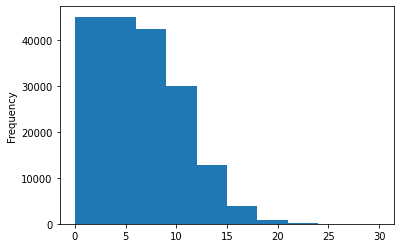

In [131]:
train_df["line_number"].plot.hist()

Có thể thấy `line-number` tập trung phần lớn trong khoảng [0-15],phần còn lại có rất ít bản tóm tắt nào có số dòng lớn như vậy. Do đó, chúng ta sẽ chỉ one_hot cho `line_number` với tối đa 15 phần tử 

In [132]:
LINE_NUMBER_DEPTH=15

train_line_number_one_hot = tf.one_hot(train_df["line_number"], depth=LINE_NUMBER_DEPTH)
val_line_number_one_hot = tf.one_hot(val_df["line_number"], depth=LINE_NUMBER_DEPTH)
test_line_number_one_hot = tf.one_hot(test_df["line_number"], depth=LINE_NUMBER_DEPTH)
train_line_number_one_hot[:5]

<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

trong `tf.one_hot()` ta thiết lập tham số `depth=15` có nghĩa là : 
+ Nếu `line_number` <= 15 thì vị trí của nó (line_number) trong một mảng gồm 15 phần tử sẽ là 1, còn lại là 0
+ Nếu `line_number` > 15 thì mặc định tất cả 15 phần tử trong mảng đó đều là 0. 

Tương tự, chúng ta cũng sẽ one_hot cho `total_lines`. Trước tiên sẽ xem mật độ phân bố của total trong tất cả các bản tóm tắt : 


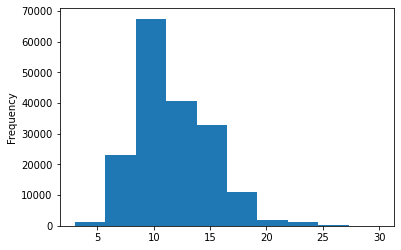

In [133]:
train_df["total_lines"].plot.hist()

`total_lines` dao động phần lớn trong khoảng [6-19]. Để rõ hơn, chúng ta sẽ lấy 98% `total_lines` sẽ ở đâu 

In [134]:
np.percentile(train_df["total_lines"], 98)

20.0

Như vậy, 98% só bản tóm tắt có `total_lines` < 20. Chúng ta sẽ one_hot `total_lines` với `depth=20`

In [135]:
TOTAL_LINES_DEPTH=20

train_total_lines_one_hot = tf.one_hot(train_df["total_lines"], depth=TOTAL_LINES_DEPTH)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"], depth=TOTAL_LINES_DEPTH)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"], depth=TOTAL_LINES_DEPTH)

train_total_lines_one_hot[:5]

<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

Các tensors nhúng vị trí đã sẵn sàng. Đã đến lúc xây dựng mô hình lớn nhất. Trong mô hình này, chúng ta sẽ kết hợp nhúng token, nhúng ký tự, và nhúng vị trí. 

Cụ thể, chúng ta sẽ đi qua các bước sau: 
1. Tạo mô hình nhúng token (tương tự `model_1`) 
2. Tạo mô hình nhúng ký tự (tương tự `model_2`)
3. Tạo mô hình line_number (đưa tensor `line_number_one_hot` vào inputs và truyền qua một layer phi tuyến)
4. Tạo mô hình total_lines (đưa tensor `total_lines` vào inputs và truyền qua một layer phi tuyến)
5. Kết hợp (sử dụng [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) output của 1 và 2 thành layer nhúng token-character và chuyển chuỗi đầu ra của nó như Hình 1 và phần 4.2 trong [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
6. Kết hợp (sử dụng [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) output của 3,4 và 5 thành layer nhúng token-character-positional 
7. Tạo một layer output để chấp nhận nhúng tribrid và taọ ra xác suất của các label được dự đoán
8. Kết hợp các input của 1, 2, 3, 4 và output của 7 để tạo thành một mô hình. 

In [136]:
# 1 Tạo mô hình nhúng token
token_inputs = layers.Input(shape=(), dtype="string")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(300, activation="relu")(token_embeddings)
token_model = Model(token_inputs, token_outputs)
# 2. Tạo mô hình nhúng ký tự 
char_inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = Model(char_inputs, char_bi_lstm)
# 3. Tạo mô hình line_number 
line_number_inputs = layers.Input(shape=(LINE_NUMBER_DEPTH,))
line_number_outputs = layers.Dense(64, activation="relu")(line_number_inputs)
line_number_model = Model(line_number_inputs, line_number_outputs)
# 4.Tạo mô hình total_lines
total_lines_inputs = layers.Input(shape=(TOTAL_LINES_DEPTH,))
total_lines_outputs = layers.Dense(64, activation="relu")(total_lines_inputs)
total_lines_model = Model(total_lines_inputs, total_lines_outputs)
# 5. Kết hợp 1 và 2 để tạo thành layer token-character
hybrid_token_embeddings = layers.Concatenate(name="token_char_embedding_hybrid")([token_model.output, char_model.output])
hybrid_token_embeddings_dropout = layers.Dropout(0.5)(hybrid_token_embeddings) # Sử dụng dropout theo như phần 4.2
dense_embeddings = layers.Dense(300, activation="relu")(hybrid_token_embeddings_dropout)
final_hybrid_token_embeddings_dropout = layers.Dropout(0.5)(dense_embeddings)
# 6. Kết hợp 3,4 và 5 để tạo thành layer tribrid-token-character-position
tribrid_token_embeddings = layers.Concatenate(name="token_char_embedding_tribrid")([final_hybrid_token_embeddings_dropout, 
                                             line_number_model.output, 
                                             total_lines_model.output])
# 7. Tạo một layer output để chấp nhận nhúng tribrid và tạo ra xác suất của các label được dự đoán
output_layer = layers.Dense(num_classes, activation="softmax")(tribrid_token_embeddings)

# 8. Kết hợp các input của 1, 2, 3, 4 và output của 7 để tạo thành một mô hình. 
model_5 = Model(inputs=[token_model.input, 
                        char_model.input, 
                        line_number_model.input, 
                        total_lines_model.input], 
                outputs=output_layer)


In [137]:
model_5.summary()

Model: "model_39"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_33 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_32 (InputLayer)           [(None,)]            0                                            
__________________________________________________________________________________________________
text_vectorization_1 (TextVecto (None, 290)          0           input_33[0][0]                   
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 512)          256797824   input_32[0][0]                   
___________________________________________________________________________________________

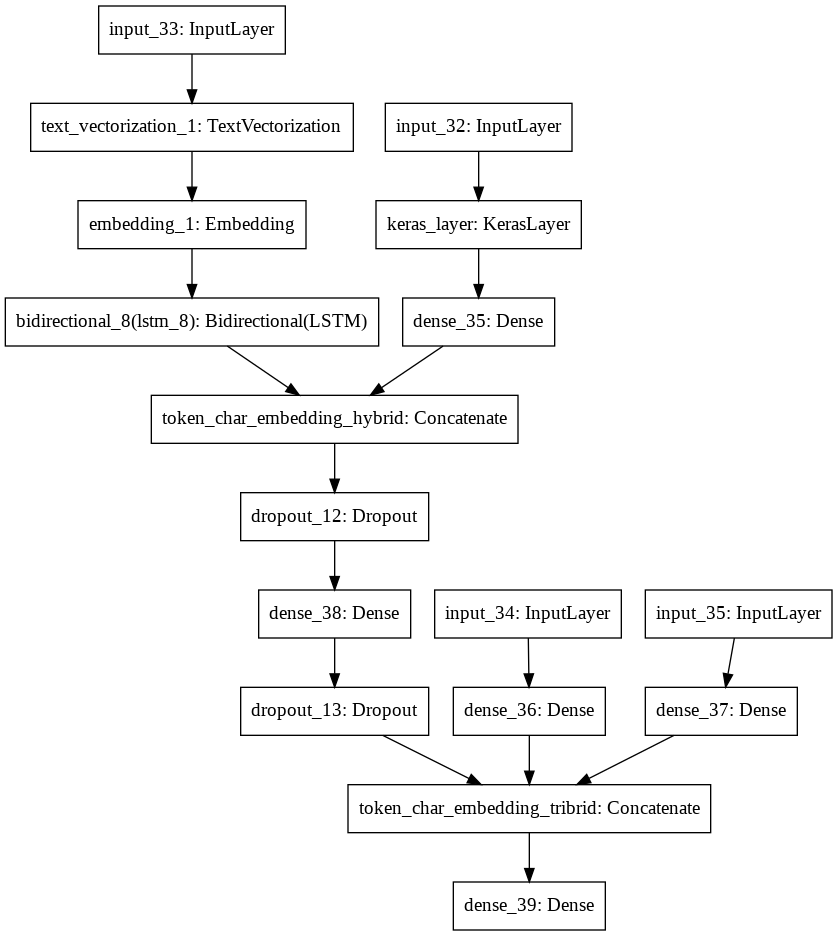

In [138]:
plot_model(model_5)

Về cơ bản, những gì chúng ta đang làm là cố gắng mã hóa càng nhiều thông tin về chuỗi càng tốt thành các nhúng khác nhau (inputs) để mô hình có cơ hội tốt nhất để tìm ra labels nào thuộc về một chuỗi (outputs).

Bạn sẽ nhận thấy mô hình của chúng ta trông rất giống với mô hình được hiển thị trong Hình 1 của [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf). Tuy nhiên, có một số điểm khác nhau : 

+ Chúng tôi đang sử dụng nhúng token trong TensorFlow Hub được train trước thay vì nhúng của GloVe.
+ Tại `token_char_embedding_hybrid` Sử dụng Dense layer thay vì bi-LSTM layer
+ Phần 4.2 của bài báo đề cập đến việc nhúng mã token và ký tự được cập nhật trong quá trình train, nhưng các bản nhúng trong TensorFlow được train trước đều không được quyền train.
+ Bài báo sử dụng trình tối ưu hóa [`SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD), nhưng chúng tôi sẽ sử dụng với [`Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).



In [139]:
# Check which layers of our model are trainable or not
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f78eeacc450> True
<keras.engine.input_layer.InputLayer object at 0x7f78eea60790> True
<keras.layers.preprocessing.text_vectorization.TextVectorization object at 0x7f790c272490> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7f7984b30590> False
<keras.layers.embeddings.Embedding object at 0x7f790c211990> True
<keras.layers.core.Dense object at 0x7f78eea60b50> True
<keras.layers.wrappers.Bidirectional object at 0x7f78ee9c2b90> True
<keras.layers.merge.Concatenate object at 0x7f78f0837410> True
<keras.layers.core.Dropout object at 0x7f78f0dacb90> True
<keras.layers.core.Dense object at 0x7f78f0837450> True
<keras.engine.input_layer.InputLayer object at 0x7f78f210b510> True
<keras.engine.input_layer.InputLayer object at 0x7f78f0817210> True
<keras.layers.core.Dropout object at 0x7f78eea4e7d0> True
<keras.layers.core.Dense object at 0x7f78f0d46f50> True
<keras.layers.core.Dense object at 0x7f78f0eaa190> True
<keras.layers.merge.Conc

Một lần nữa, để giữ cho các thử nghiệm được diễn ra nhanh chóng, chúng ta sẽ sử dụng 20k bản tóm tắt, phân tán chúng thành từng cụm. 

Mô hình yêu cầu bốn inputs: 
1. Train line numbers one-hot tensor (`train_line_numbers_one_hot`)
2. Train total lines one-hot tensor (`train_total_lines_one_hot`)
3. Token-level sequences tensor (`train_sentences`)
4. Char-level sequences tensor (`train_chars`)


In [140]:
train_token_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars, train_line_number_one_hot, train_total_lines_one_hot))
train_token_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_pos_dataset = tf.data.Dataset.zip((train_token_char_pos_data, train_token_char_pos_labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_token_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars, val_line_number_one_hot, val_total_lines_one_hot))
val_token_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_token_char_pos_dataset = tf.data.Dataset.zip((val_token_char_pos_data, val_token_char_pos_labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_token_char_pos_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars, test_line_number_one_hot, test_total_lines_one_hot))
test_token_char_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_token_char_pos_dataset = tf.data.Dataset.zip((test_token_char_pos_data, test_token_char_pos_labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_token_char_pos_dataset

<PrefetchDataset shapes: (((None,), (None,), (None, 15), (None, 20)), (None, 5)), types: ((tf.string, tf.string, tf.float32, tf.float32), tf.float64)>

In [141]:
# Biên dịch mô hình 
model_5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
    optimizer="adam",
    metrics=["accuracy"]
)

In [142]:
model_5_history = model_5.fit(
    train_token_char_pos_dataset, 
    steps_per_epoch=int(0.2*len(train_token_char_pos_dataset)),
    epochs=5, 
    validation_data=val_token_char_pos_dataset, 
    validation_steps=int(0.1*len(val_token_char_pos_dataset))
)

Epoch 1/5
1125/1125 [==============================] - 136s 117ms/step - loss: 1.0333 - accuracy: 0.7709 - val_loss: 0.9488 - val_accuracy: 0.8281
Epoch 2/5
1125/1125 [==============================] - 130s 116ms/step - loss: 0.9549 - accuracy: 0.8244 - val_loss: 0.9325 - val_accuracy: 0.8358
Epoch 3/5
1125/1125 [==============================] - 130s 115ms/step - loss: 0.9508 - accuracy: 0.8271 - val_loss: 0.9229 - val_accuracy: 0.8428
Epoch 4/5
1125/1125 [==============================] - 131s 116ms/step - loss: 0.9399 - accuracy: 0.8341 - val_loss: 0.9123 - val_accuracy: 0.8497
Epoch 5/5
1125/1125 [==============================] - 131s 117ms/step - loss: 0.9376 - accuracy: 0.8371 - val_loss: 0.9198 - val_accuracy: 0.8418


In [143]:
model_5.evaluate(val_token_char_pos_dataset)

945/945 [==============================] - 53s 56ms/step - loss: 0.9135 - accuracy: 0.8466


[0.9135044813156128, 0.8465510606765747]

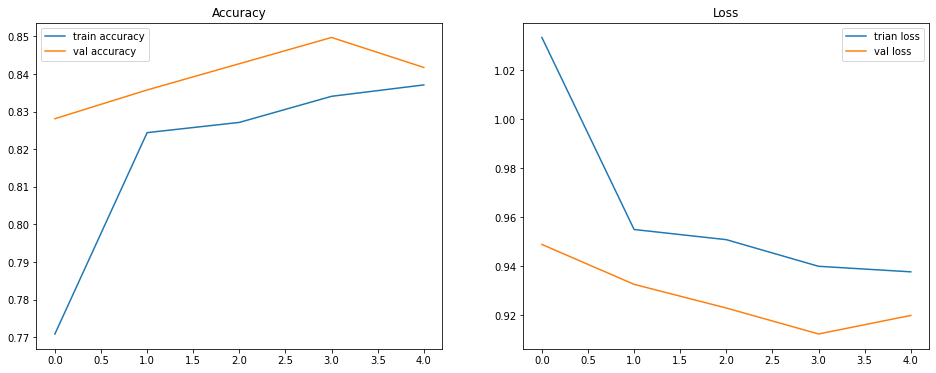

In [144]:
plot_loss_curves(model_5_history)

In [145]:
model_5_pred_probs = model_5.predict(val_token_char_pos_dataset,verbose=1)
model_5_pred_probs

945/945 [==============================] - 51s 52ms/step


array([[0.5596566 , 0.09881553, 0.01417628, 0.2944636 , 0.03288797],
       [0.5742848 , 0.10639202, 0.08415896, 0.21455197, 0.02061222],
       [0.3527974 , 0.12337479, 0.06006135, 0.40468547, 0.05908103],
       ...,
       [0.02096361, 0.06051384, 0.02068153, 0.02835106, 0.86948997],
       [0.02574691, 0.3007047 , 0.03855949, 0.02550375, 0.60948515],
       [0.08094693, 0.7213978 , 0.10251644, 0.03508974, 0.06004901]],
      dtype=float32)

In [146]:
model_5_pred_labels = tf.argmax(model_5_pred_probs, axis=1).numpy()
model_5_pred_labels

array([0, 0, 3, ..., 4, 4, 1])

In [149]:
model_5_results = calculate_results(val_labels_encoder, model_5_pred_labels)
model_5_results

{'accuracy': 0.8465510393221236,
 'f1-score': 0.8429548457340953,
 'precision': 0.8496437022884074,
 'recall': 0.8465510393221236}

## So sánh hiệu suất của các mô hình

chúng ta đã train đến 5 mô hình kèm theo mô hình cơ sở. Bây giờ là lúc để so sánh khả năng dự đoán của mô hình trên tập dữ liệu kiểm định với 4 phương pháp đánh giá phân loại : 

In [151]:
all_model_results = pd.DataFrame({
    "baseline_model" : baseline_results , 
    "model_1_token_embeddings" : model_1_results, 
    "model_2_char_embeddings" : model_2_results, 
    "model_3_pretrain_embeddings" : model_3_results, 
    "model_4_token_char_hybrid" : model_4_results, 
    "model_5_token_char_position_tribrid" : model_5_results
})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1-score
baseline_model,0.721832,0.718647,0.721832,0.698925
model_1_token_embeddings,0.813452,0.816575,0.813452,0.806554
model_2_char_embeddings,0.736198,0.735023,0.736198,0.733572
model_3_pretrain_embeddings,0.756223,0.750465,0.756223,0.751319
model_4_token_char_hybrid,0.769860,0.767311,0.769860,0.766519
model_5_token_char_position_tribrid,0.846551,0.849644,0.846551,0.842955


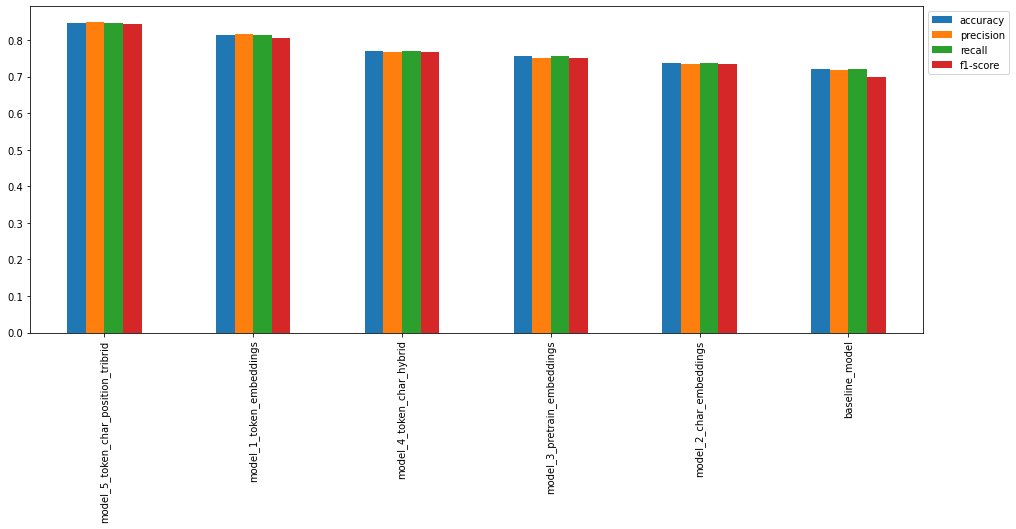

In [155]:
all_model_results.sort_values(by="f1-score",ascending=False).plot.bar(figsize=(16,6)).legend(bbox_to_anchor=([1,1]))

So sánh `f1-score` giữa các mô hình 

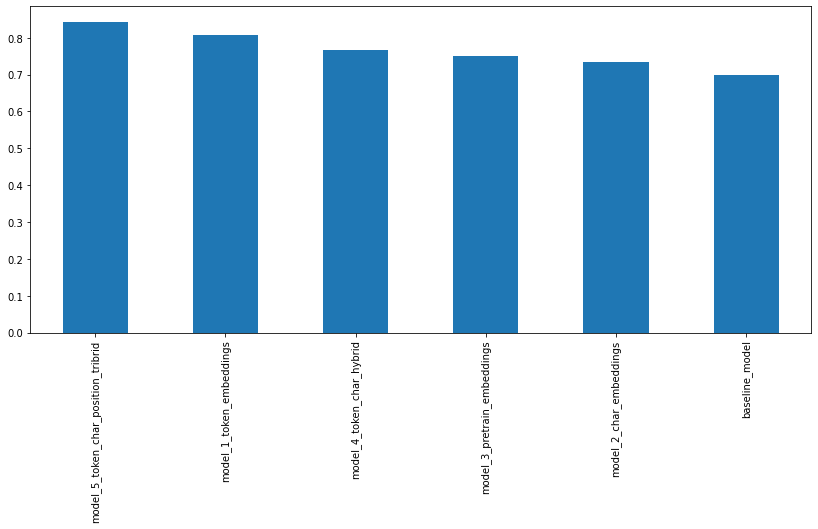

In [162]:
all_model_results.sort_values("f1-score",ascending=False)["f1-score"].plot.bar(figsize=(14,6))

Dựa trên `f1-score`, mô hình nhúng `token_char_position_tribrid` là mô hình tốt nhất. Mặc dù vậy, `f1-score` trong mô hình của chúng ta chỉ đạt ~84% trong khi trong [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf) lên đến ~90%. 

Có một số điều cần lưu ý về sự khác biệt này: 
+ Các mô hình của chúng ta (ngoại trừ mô hình cơ sở) chỉ được train ~18.000 mẫu dữ liệu (10% số cụm) mẫu  ~180.000 mẫu đầy đủ trong tập dữ liệu 20k RCT.
+ Các mức hiệu suất dự đoán của mô hình của chúng tôi đã được đánh giá trên tập dữ liệu xác thực chứ không phải tập dữ liệu thử nghiệm (chúng ta sẽ sớm đánh giá trên tập dữ liệu thử nghiệm).

Để mô hình được đánh giá chính xác nhất, chúng ta sẽ train `model_5` với toàn bộ dữ liệu train thay vì 10% dữ liệu như trước đây và train trong 5 epochs. 



## Train toàn bộ dữ liệu với mô hình tốt nhất

Trong phần này, chúng ta sẽ train mô hình tốt nhất (`model_5`) với đầy đủ dữ liệu 20.000 bản tóm tắt (~180.000 câu), cùng với việc cho phép layer nhúng đã được train trước đó được phép train với dữ liệu của chúng ta. Đầu tiên, chúng ta sẽ mở `tf_hub_embedding_layer` được phép train

In [197]:
tf_hub_embedding_layer.trainable = True

Kiểm tra các layer trong mô hình `model_5` đã mở train hay chưa : 

In [198]:
for layer  in model_5.layers : 
  print(layer.name, layer.trainable)

input_33 True
input_32 True
text_vectorization_1 True
keras_layer True
embedding_1 True
dense_35 True
bidirectional_8 True
token_char_embedding_hybrid True
dropout_12 True
dense_38 True
input_34 True
input_35 True
dropout_13 True
dense_36 True
dense_37 True
token_char_embedding_tribrid True
dense_39 True


`embedding_1` đã có thể train trên dữ liệu của chúng ta. Tiếp theo cần compile mô hình lại và train mô hình với đầy đủ dữ liệu trong 3 epochs

In [199]:
model_5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
    optimizer="adam",
    metrics=["accuracy"]
)

In [200]:
model_5_history_full_data = model_5.fit(
    train_token_char_pos_dataset, 
    steps_per_epoch=len(train_token_char_pos_dataset),
    epochs=3, 
    validation_data=val_token_char_pos_dataset,
    validation_steps=int(0.1 * len(val_token_char_pos_dataset))
)

Epoch 1/3
5627/5627 [==============================] - 1618s 286ms/step - loss: 0.8943 - accuracy: 0.8641 - val_loss: 0.8756 - val_accuracy: 0.8654
Epoch 2/3
5627/5627 [==============================] - 1607s 286ms/step - loss: 0.8080 - accuracy: 0.9213 - val_loss: 0.8917 - val_accuracy: 0.8521
Epoch 3/3
5627/5627 [==============================] - 1606s 285ms/step - loss: 0.7424 - accuracy: 0.9653 - val_loss: 0.9196 - val_accuracy: 0.8511


In [201]:
model_5.evaluate(val_token_char_pos_dataset)

945/945 [==============================] - 51s 54ms/step - loss: 0.9101 - accuracy: 0.8559


[0.9100814461708069, 0.8558850884437561]

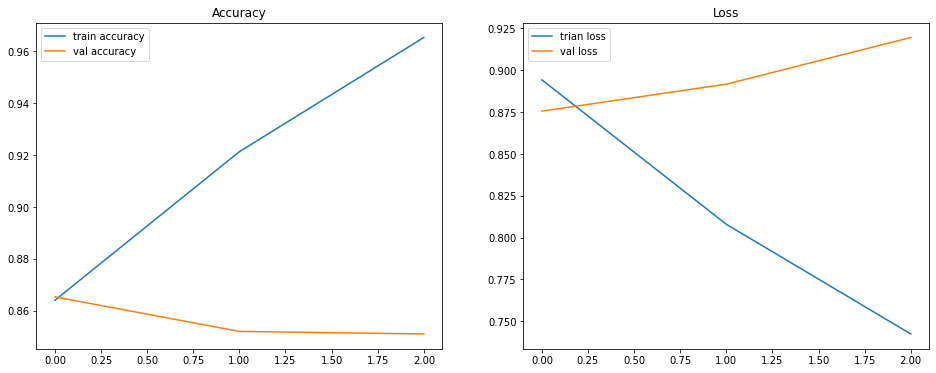

In [202]:
plot_loss_curves(model_5_history_full_data)

## 8. Đánh giá mô hình trên tập dữ liệu test

Để làm cho hiệu suất của mô hình có thể so sánh hơn với các kết quả được báo cáo trong Bảng 3 của [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf), chúng ta sẽ đưa ra dự đoán trên tập dữ liệu `test` và đánh giá chúng.

In [203]:
test_pred_probs = model_5.predict(test_token_char_pos_dataset,verbose=1)
test_pred_probs

942/942 [==============================] - 50s 52ms/step


array([[0.7620796 , 0.07212228, 0.0470728 , 0.05983428, 0.05889097],
       [0.05471471, 0.02601075, 0.17094806, 0.09807781, 0.6502487 ],
       [0.06175671, 0.03193549, 0.7850063 , 0.06932633, 0.05197508],
       ...,
       [0.03283619, 0.09082782, 0.03028124, 0.03489877, 0.81115603],
       [0.03325703, 0.11122436, 0.03141427, 0.03372067, 0.7903837 ],
       [0.04100868, 0.8433286 , 0.03736025, 0.02516225, 0.05314017]],
      dtype=float32)

In [204]:
test_pred_labels = tf.argmax(test_pred_probs,axis=1).numpy()
test_pred_labels

array([0, 4, 2, ..., 4, 4, 1])

In [205]:
test_results = calculate_results(test_labels_encoder, test_pred_labels)
test_results

{'accuracy': 0.8486809357889498,
 'f1-score': 0.8456306856302124,
 'precision': 0.8487085206365422,
 'recall': 0.8486809357889498}

Có vẻ như mô hình tốt nhất của chúng ta (cho đến nay) vẫn không thể vượt qua được khả năng dự đoán của mô hình trong `Pubmed` (90% với f1-score).

## Tìm dự đoán sai nhất

Một trong những cách tốt nhất để điều tra xem mô hình của bạn đang sai ở đâu (hoặc có khả năng là dữ liệu của bạn bị sai) là tìm các dự đoán "sai nhất".

Các dự đoán sai nhiều nhất là các mẫu trong đó mô hình đã đưa ra dự đoán với xác suất cao nhưng lại sai (dự đoán của mô hình không phù hợp với label sự thật cơ bản).

Việc xem xét các dự đoán sai nhất có thể cung cấp cho chúng ta thông tin có giá trị về cách cải thiện các mô hình khác hoặc sửa các label trong dữ liệu. 



In [206]:
test_pred_classes = [class_names[label] for label in test_pred_labels]

In [207]:
test_df["predict"] = test_pred_classes
test_df["predict prob"] = tf.reduce_max(test_pred_probs,axis=1).numpy()
test_df["result"] = test_df["predict"] == test_df["label"]
test_df.head(20)

,label,text,line_number,total_lines,predict,predict prob,result
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,BACKGROUND,0.762080,True
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,RESULTS,0.650249,True
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.785006,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.760401,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.842392,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.857184,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.860895,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.687371,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,CONCLUSIONS,0.760578,True
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.573547,True


In [208]:
top_100_wrong = test_df[test_df["result"] == False].sort_values("predict prob",ascending=False)[:100]
top_100_wrong

,label,text,line_number,total_lines,predict,predict prob,result
24909,OBJECTIVE,our objective was to evaluate the efficacy and...,0,18,BACKGROUND,0.912732,False
15926,OBJECTIVE,"the aim is to determine , from the patient 's ...",0,18,BACKGROUND,0.899860,False
24764,OBJECTIVE,schools are considered an attractive setting t...,0,18,BACKGROUND,0.895462,False
9932,OBJECTIVE,the aim of this study was to evaluate the peri...,1,16,BACKGROUND,0.894811,False
27699,OBJECTIVE,clonidine is often used as a sedative in criti...,0,12,BACKGROUND,0.892765,False
...,...,...,...,...,...,...,...
19222,METHODS,"results-of the @ dogs receiving maropitant , n...",6,10,RESULTS,0.859362,False
29834,CONCLUSIONS,waz changed over time and the predictors of ch...,9,13,RESULTS,0.859221,False
3665,CONCLUSIONS,there were no significant differences between ...,9,10,RESULTS,0.859136,False
18392,CONCLUSIONS,fao + patients tended to be more impaired and ...,8,9,RESULTS,0.858869,False


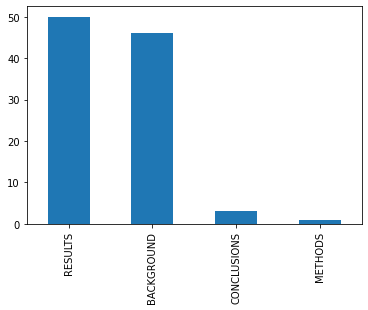

In [209]:
top_100_wrong["predict"].value_counts().plot.bar()

Bạn nhận thấy điều gì về những dự đoán sai nhất? một câu thuộc `RESULT` và `METHOD` thì sai nhiều nhất, có thể trong 2 trường này có những từ hoặc ký tự tương đồng với nhau khiến mô hình dễ bị nhầm lẫn.